In [ ]:
pip install --upgrade gensim

In [ ]:
pip install pyldavis==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136169 sha256=7244403c4fe45161f37ec1b1a9c947d791a974251dc20d5ac40161223f49d439
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis


In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16510 sha256=5aa5b3a75195ee134650f5caf66c57cb8f9bef5e8aa3855bb6981fe76296a0e4
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
import pandas as pd
import re
import string
from tqdm import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
#membuka file
import pandas as pd
data = pd.read_csv('bri30k.csv')
data.head()

,userName,at,content,score
0,Firmansyah Firmansyah,2023-01-25 03:50:35,Mau apapun jadi cepat dan simple,5
1,Roes Niati,2023-01-25 03:48:26,Dengan adanya Brimo segalanya lebih muda,5
2,Dirot Nub,2023-01-25 03:47:35,Oke,4
3,Eneng Willy fitriany95,2023-01-25 03:47:21,Gk jls daftar berimo susah.. bank BRI bukan me...,1
4,Utarie Arya,2023-01-25 03:44:54,Sangat membantu👍 the best pokoknya❤,5


#Preprocessing Data

In [ ]:
# Case Folding == lower Casing
data['content']  = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['content'].head()

0                     mau apapun jadi cepat dan simple
1             dengan adanya brimo segalanya lebih muda
2                                                  oke
3    gk jls daftar berimo susah.. bank bri bukan me...
4                  sangat membantu👍 the best pokoknya❤
Name: content, dtype: object

In [ ]:
# Removing Punctuation
data['content'] = data['content'].str.replace('[^\w\s]',' ',regex=True)
data['content'].head()

0                     mau apapun jadi cepat dan simple
1             dengan adanya brimo segalanya lebih muda
2                                                  oke
3    gk jls daftar berimo susah   bank bri bukan me...
4                  sangat membantu  the best pokoknya 
Name: content, dtype: object

In [ ]:
#remove angka
data['content']=data['content'].str.replace(r'[\d+]', '',regex=True)
data['content']

0                         mau apapun jadi cepat dan simple
1                 dengan adanya brimo segalanya lebih muda
2                                                      oke
3        gk jls daftar berimo susah   bank bri bukan me...
4                      sangat membantu  the best pokoknya 
                               ...                        
29995                                   aplkasi oke banget
29996    mau download aplikasi nya aja susah nya minta ...
29997                                                  top
29998    brimo saya kenapa gak bisa di bukak    salah p...
29999              brimo eror terus ga bisa dibuka apk nya
Name: content, Length: 30000, dtype: object

In [ ]:
#Normalization

import re, string
import pandas as pd

# membaca file normalisasi
df_norm = pd.read_csv("normalbri.txt")
# membuat kamus normalisasi (dictionary)
df_kamus = {}
for dt in df_norm.itertuples():
  df_kamus[dt[1]] = dt[2]

def preprocess(row):

  # normalisasi kata
  row['content'] = ' '.join([df_kamus[a] if a in df_kamus else a for a in row['content'].split()])
  return row

data = data.apply(preprocess, axis=1)
data.head()

,userName,at,content,score
0,Firmansyah Firmansyah,2023-01-25 03:50:35,mau apapun jadi cepat dan simpel,5
1,Roes Niati,2023-01-25 03:48:26,dengan adanya brimo segalanya lebih mudah,5
2,Dirot Nub,2023-01-25 03:47:35,okay,4
3,Eneng Willy fitriany95,2023-01-25 03:47:21,tidak jelas daftar brimo susah bank bri bu...,1
4,Utarie Arya,2023-01-25 03:44:54,sangat membantu the terbaik pokoknya,5


In [ ]:
#Save hasil setelah normalisasi
data.to_csv("hasilnormal.csv", sep=',')

In [ ]:
#stopwords
import requests
def stopwords():
    r = requests.get("https://raw.githubusercontent.com/elenprihanaa/stopword/main/stopword_dokumen").text
    data = []
    for x in r.split("\n"):
        data.append(x)
    return data

In [ ]:
#stopwords
stopwords()

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu',
 'dulun

In [ ]:
# Import Stopword Factory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#Create factory
factory = StopWordRemoverFactory()
more_stopword = ['aamiin', 'ada', 'adalah', 'admin', 'agar', 'ah', 'aja', 'akan', 'anda', 'android', 'anjing', 'anjir', 'apa', 'aplikasi', 'aplikasinya',
                 'asu', 'atas', 'atau', 'atuh', 'awokwkkw', 'babi', 'bang', 'banget', 'bangsat', 'bank', 'banyak', 'begini', 'bego', 'beh', 'betul', 'bri',
                 'brimo',  'bro', 'buat', 'cie', 'crot', 'cuk', 'cuy', 'dah', 'dan', 'dari',  'deh', 'dengan', 'di', 'dia', 'dll', 'dong', 'dulu', 'eh',
                 'entah', 'gan', 'gas', 'gini', 'gitu', 'goblok', 'guys', 'hai', 'halo', 'harus', 'heheheheh', 'hheeheehh', 'hhh', 'hmm', 'huft', 'huh',
                 'huhu', 'ih', 'ini', 'itu', 'jadi', 'jos', 'juga', 'kah', 'kak', 'kalau', 'kalian', 'kan', 'kayak', 'ke', 'kek', 'kenapa', 'kok', 'kontol',
                 'lagi', 'lah', 'lain', 'lho', 'loh', 'lohh', 'luh', 'mah', 'mbanking', 'min', 'monyet', 'nge', 'ni', 'nih', 'nya', 'oleh', 'padahal', 'pas',
                 'pun', 'saat', 'saja', 'sampai', 'sangat', 'saya', 'sempat', 'seperti', 'si', 'sih', 'sip', 'siplah', 'tadi', 'tai', 'tapi', 'telah', 'tersebut',
                 'terus', 'tidak', 'tuh', 'untuk', 'waw', 'wkwk', 'wkwkwk', 'wkwkwkwkw', 'woi', 'wow', 'woy', 'ya', 'yah', 'bintang', 'januari','aa','aaa',
                 'aaaaaaaaaaaaaaa', 'aaaakkkkkhhh', 'aah', 'aaik', 'aamiiiin', 'aamiiin', 'aamiinn','pokoknya', 'bos', 'digunakan', 'tau', 'okay', 'top', 'iya',
                 'januari', 'ppp', 'aduh','a', 'b', 'kenapa', 'karena', 'gua', 'ny', 'bos', 'gimana', 'pokok', 'allah', 'agustus', 'apikasi', 'pengaplikasian',
                 'kemarin', 'ioweu', 'loweu', 'gue', 'juli', 'permisi', 'la', 'bangke', 'knp', 'ku', 'perbankkan', 'ppeq', 'bilang', 'gila', 'ee', 'playstore',
                 'sinting', 'zzz', 'orang', 'pokok', 'the', 'kmrn', 'gt', 'pakai', 'gimana', 'pokok', 'e', 'bosku', 'r', 'eae', 'kemarin', 'play store', 'apapun',
                 'dimanapun', 'kapanpun', 'kapan', 'dimana',  'jam', 'kayak', 'mana', 'mane', 'iya', 'la', 'ku', 'mungkin', 'o', 'pokokny',  'pokok', 'ny', 'tanggal',
                 'januari', 'kadang', 'sekebon', 'kebon', 'sesuai', 'apa', 'the', 'katanya', 'uhuy', 'aduh', 'minggu', 'allahuakbar', 'yaul', 'bgg', 'it', 'tanggal',
                 'slebew', 'was', 'mi', 'tan', 'gara', 'terkadang', 'assalamualaikum', 'tolol', 'tok', 'vivo', 'ys', 'mending', 'ai', 'ku', 'perbankan', 'aduh', 'gimana',
                 'haduh', 'weh', 'e', 'kocak', 'jam', 'at', 'an', 'gara', 'iiiiiii', 'tahun', 'sh', 'slma', 'selama', 'terus', 'kadang', 'jam', 'lewat', 'hari',
                 'ekekekekek', 'wkwkwkwkwk', 'jooooz', 'z', 'kab', 'maaf', 'ka', 'ayo', 'iya', 'l', 'doang', 'hallo', 's', 'ldo', 'wib', 'cok', 'busyet', 'dlo', 'dulu',
                 't',  'i', 'ne', 'x', 'hayuk', 'ak', 'pd', 'biar', 'bagi', 'betapa', 'memang', 'mu', 'isthebis', 'tring', 'hitam', 'daging', 'at', 'selesai', 'beb',
                 'september', 'tanggal', 'suka', 'kode',  'cuuiiihh', 'jiwa', 'hallo', 'sobat', 'on', 'jam', 'cantik', 'muah', 's', 'lalu', 'sir', 'sipsip', 'jiwa', 'biar',
                 'bagi', 'tau', 'mesti', 'eeh', 'www', 'com', 'thing', 'abang', 'abb',  'abc', 'abge', 'acu', 'adk', 'adm', 'adminnya', 'ado', 'adu', 'aduhai', 'adzim', 'aetra',
                 'aetra', 'af', 'agen', 'agustus', 'ahhh', 'ahir', 'ai', 'aish', 'ajhh', 'ak', 'akh', 'akil', 'akp', 'aktf', 'akwok', 'al', 'alf', 'zonk', 'zzz', 'yv', 'yy', 'yyo',
                 'allah', 'allahuakbar', 'allahumma', 'alpa', 'am', 'ytta', 'yu', 'yuk', 'yup', 'yv', 'zaman', 'co', 'id', 'vivo', 'm', 'banking', 'hud', 'bintang', 'bicara',  'malulu',
                 'maaf', 'jan', 'wkwkwkw', 'gulagi', 'mas', 'mbak', 'nama', 'mana', 'desember', 'google', 'ngebak', 'puenak', 'sumpah', 'bosq', 'tua', 'november', 'januari', 'lawak', 'menit',
                 'an', 'bulan', 'pintar', 'orang', 'bestie', 'ku', 'sa', 'm', 'jaya', 'octo', 'jepret', 'hahahaha', 'ajibb', 'brimonyong', 'sobat', 'sekian', 'terimagaji', 'heleh',
                 'kek', 'salam', 'hormat', 'elah', 'hadeeeeee', 'kadang', 'songong', 'beku', 'ppp', 'ndg', 'sr', 'bugil', 'suruh', 'maksud', 'broo', 'tinggal', 'hm', 'hehehehe', 'terusssss',
                 'loosss', 'setan', 'blt', 'taii', 'anjirr', 'kemarin', 'mu', 'haduhhh', 'owalah', 'ayam', 'slebew', 'sat', 'set', 'super', 'duper', 'aaik', 'ppkm', 'ta', 'ontul', 'gigg', 'yuk',
                 'kelas', 'bumn', 'pol', 'enjy', 'euy', 'szdaza', 'ayuk', 'orang', 'super', 'depan', 'emang', 'boskuhh', 'dengan', 'hh', 'wd', 'mb', 'maksud', 'woe', 'xiexie', 'lieurrrrr', 'a' 'ing',
                 'bke', 'she', 'ta', 'hehehe', 'eeeemmmmmmmmm', 'besok', 'enak', 'level', 'ulti', 'grafik', 'terbag', 'escavator', 'minecraft', 'hiro', 'selena', 'horor', 'de', 'minggu', 'amin', 'teman',
                 'heheh', 'mageran', 'ngapa', 'kuuhh', 'my', 'mb', 'kb', 'jaya',  'mimin', 'amleng', 'main', 'aplai', 'ganggam', 'tangan', 'brl', 'bismillah', 'astaga', 'e', 'ampun', 'hk', 'hkj', 'kakak',
                 'dikit', 'jiwa', 'luncur', 'banking', 'mandir', 'kirain', 'an', 'masyarakat', 'indonesia', 'harap', 'x', 'kasih', 'bonus', 'jaman', 'setttt', 'sat', 'biar', 'giveaway', 'sate', 'tuai', 'ma',
                 'uu', 'toyib', 'sapa', 'gimanain', 'tuhan', 'dapat', 'item', 'kali', 'neko', 'boa', 'bangkrut', 'aah', 'lanjut', 'cus', 'madep', 'kiblat', 'jempol', 'maka', 'suwek', 'tugas', 'gandos', 'jaya',
                 'eah', 'dong', 'ud', 'resoonya', 'fine', 'keras', 'kepala', 'joshh', 'ndan', 'sayang', 'busuk', 'ajar', 'biar', 'gede', 'konyol', 'joo', 'kalimat', 'nada', 'eeh', 'aplit', 'saja', 'yahut', 'hidup',
                 'rabu', 'ber', 'belit', 'mageran', 'coba', 'la', 'diam', 'hak', 'kapok', 'gaji', 'bulan', 'istirahat', 'mayoritas', 'gara', 'gua', 'lu', 'laknat', 'lhah', 'ank', 'males', 'semangat', 'jengkel', 'satu',
                 'menit', 'malu', 'sanbat',  'semangat', 'sontoloyo', 'gelandang', 'erna', 'gigit', 'sayang', 'kta', 'appnya', 'hehe', 'nol', 'sekian', 'of', 'the', 'nian', 'ngentot', 'haha', 'ewww', 'ujung', 'jari', 'sp',
                 'bwaahahahahhaa', 'eeehhhh', 'oon', 'bca', 'keliling', 'on', 'off', 'minus', 'tersebut', 'ak', 'emosi', 'maaf', 'jaya', 'perban', 'bas', 'besok', 'cantum', 'kece', 'payah', 'ampun', 'heran', 'ngapa', 'untuk',
                 'akir', 'siaplikaai', 'loh', 'pandang', 'dishub', 'dalam', 'brp', 'lur', 'nyata', 'bingung', 'halaman', 'pesawat', 'lucu', 'nanya', 'sekali', 'mesti', 'mental', 'do', 'bojonggede', 'rena', 'ken', 'akibat', 'hoaaamb'
                 'ken', 'sana', 'panas', 'limpah', 'milik', 'rezeki', 'hidup', 'waspada', 'its', 'la', 'pagi', 'tele', 'kampret', 'pu', 'rilis', 'enak', 'jis', 'cabang', 'ati', 'macam', 'gila', 'putar', 'stress', 'baterai',
                 'tdi', 'mkn', 'abadi', 'kaget', 'sungguh', 'nyoba', 'mbangking', 'heee', 'nilai', 'kena', 'lur', 'banking', 'dear', 'v', 'gamblang', 'ken', 'golong', 'wufffhh', 'masyarakat', 'yeolok', 'kapok', 'm',
                 'cok', 'gogo', 'iya', 'ya', 'oo', 'kon', 'ta', 'yo', 'kdo', 'cer', 'jiddan', 'inh', 'gimana', 'res', 'alias', 'a', 'fix', 'lah', 'tek', 'wei', 'akan', 'emang', 'terus', 'turun', 'ayo', 'biar', 'bi',
                 'sejahtera', 'ngopi', 'nn', 'mkjj', 'sih', 'kala', 'jeda', 'alas', 'sakitkepala', 'tenaga', 'swasta', 'ajar', 'cupu', 'ayok', 'buru', 'kemarin', 'mana', 'sabtu', 'minggu', 'libur', 'we', 'tera', 'gimn',
                 'kesini', 'kesana', 'lek', 'euyy', 'ujung', 'men', 'tahun', 'e', 'brimoku', 'lomba', 'detik', 'tensi', 'seneven', 'bumn', 'kyag', 'tuhan', 'sumpah', 'ui', 'tua', 'enek', 'teman', 'jan', 'kawan', 'hihi',
                 'ngangge', 'breh', 'atasnamafawaid', 'rejekiku', 'pro', 'ekoo', 'jancok', 'rakyat', 'jok', 'tempe', 'goreng', 'dodol', 'kereta', 'mas', 'jatuh', 's', 'bb', 'mata', 'turut', 'hallo', 'euy', 'perkara', 'bye',
                 'dab', 'selalu', 'sedih', 'brimonya', 'pusing', 'brp', 'jn', 'bu', 'nyoba', 'ngopi', 'sia', 'jaman', 'marak', 'maa', 'syaa', 'allah', 'teknologi', 'laju', 'jalan', 'ditad', 'kilat', 'manjadi', 'bumn', 'mashaallah',
                 'bentar', 'youtube', 'pesona', 'persen', 'mau', 'dikit', 'terus', 'kait', 'deberikan', 'ngeri', 'tx', 'dkm', 'situasi', 'apandi', 'makan', 'bribrimo', 'playstore', 'gd', 'bobrok', 'dapt', 'keterangn', 'jiwa',
                 'tugas', 'temanyang', 'faforit', 'ibadah', 'it', 'asli',  'lpil', 'buta', 'daerah', 'desa', 'gudang', 'kelas', 'netizen', 'keluarga', 'astaghfirullah', 'kasi',  't', 'asyik', 'gue', 'kasir', 'contoh', 'game',
                 'banding', 'puluh', 'jugjug', 'kabupaten', 'dikec','kab', 'teteh', 'kt', 'mana', 'tapeso', 'iq', 'jongkok', 'rekrut', 'sungguh', 'miris', 'dodol', 'ketawa', 'byorka', 'malumaluin', 'semakin', 'gatot', 'kaca',
                 'dandan', 'nangis', 'suami', 'memper', 'menang', 'undi', 'dam', 'jnt', 'semangat', 'satu', 'kaum', 'mager', 'sara', 'was', 'mi', 'terkadang', 'segitu', 'jempol', 'berklai', 'seronok', 'sh', 'gttu', 'shay', 'tidur',
                 'muhammad', 'bagus', 'ayo', 'manusia', 'briny', 'sumpah', 'sabrina', 'capcus', 'gi', 'aminnnnn', 'hehee', 'drdgggggyyuluuyguufudiux', 'uu', 'sd', 'uu', 'ie', 'uu', 'e', 'uu', 'ddddddf', 'maik', 'gati', 'suru', 'umat',
                 'umi', 'sudan', 'sn', 'tgk', 'waa', 'plintat', 'plintut', 'aksesoris', 'ber', 'hemm', 'guya', 'juna', 'tengleng', 'kiri', 'kanan', 'bismillahirrahmanirrahim', 'assalamualaikum', 'warahmatullahi', 'wabarakatuh',
                 'aaa', 'bravo', 'fa', 'ka', 'semarang', 'hah', 'darah', 'huuu', 'ihhp', 'hadiah', 'ehh', 'aps', 'banking', 'cerita', 'garut', 'pa', 'kwh', 'kayak', 'cring', 'adek', 'tetangga', 'dek', 'insyaallah', 'wey', 'tebener',
                 'duh', 'abal', 'ini', 'syaa', 'allah', 'kya', 'efek', 'oc', 'samngan', 'ketak', 'sukatani', 'purwakarta', 'madep', 'yop', 'uwah', 'berkli', 'gimana', 'nyawa', 'ngapa', 'brekelee', 'emang', 'men', 'begana', 'jadi',
                 'msi', 'fas', 'luncur', 'bangke', 'emmmm', 'brewok', 'brrooo', 'heheh', 'madep', 'boos', 'ky', 'apain', 'gini', 'anjingggg', 'mh', 'iada', 'bi', 'klr', 'ehh', 'clicka', 'as', 'vuwuvhvcecedccee', 'jompo', 'konoha',
                 'hdeh', 'mentok', 'jing', 'ken', 'aamiiiin', 'wadidaw', 'sut', 'pengguna', 'jooz', 'hallo', 'gin', 'tolol', 'hadeuuuuh', 'sss', 'namah', 'wd', 'geblekk', 'joshhhhhhhhhhhhhh', 'sangad', 'bobrok', 'ckckckck', 'ngomongnya',
                 'ulala', 'nyong', 'monyong', 'keur', 'yas', 'tuhan', 'wkwkw', 'hhh', 'snpe','ajhh', 'konyol', 'gila', 'la', 'margotop', 'berah', 'fp', 'coz', 'astaga', 'cc', 'e', 'tolol', 'bvus', 'mrkotop', 'ngentot', 'gimana', 'ngasih',
                 'player', 'epic', 'biarpun', 'ajaib', 'couple', 'yuk', 'printer','bluouteht', 'suruh', 'senin', 'drd', 'mesti', 'ehh', 'bilang', ' vivo', 't', 'pol', 'memper', 'qw', 'mu', 'biar', 'semesta', 'ibanking', 'duluan', 'hoo',
                 'ber', 'salam', 'mba', 'sabrina', 'gt', 'sahabat', 'gimana', 'ba', 'br', 'gregetan', 'sumpah', 'beud', 'bobrok', 'meng', 'play', 'store', 'buset', 'lun', 'asolole', 'pl', 'nicere', 'ngapain', 'kebangeten', 'playstore', 'ber',
                 'org', 'ypun', 'simaket', 'sir', 'yes', 'pd', 'ganteng', 'mas', 'aish', 'sat', 'web', 'blogjob', 'kini', 'cucuk', 'mnto', 'nak', 'lon', 'semangat', 'astaga', 'bobrok', 'nafas', 'fyuhhhh', 'yuk', 'konyol', 'gege', 'ygy', 'panco',
                 'hahaha', 'nenek', 'perusahaan', 'ayo', 'kawan', 'geblek', 'pr', 'kocak', 'kece', 'ri', 'konyol', 'marih', 'hallo', 't', 'rrdrddrrrddedddtddt', 'wkwkw', 'gokil', 'terkadang', 'adminnya', 'woww', 'cuuiiihhhh', 'long', 'of', 'ngelawak',
                 'arrrgghh', 'okemi', 'losdol', 'duh', 'jal', 'php', 'mak', 'nyusss', 'konyol', 'that', 'ee', 'dei', 'pregador', 'abge', 'debest', 'akwok', 'kwok', 'kwok', 'insyaallooh', 'suoooooosssssss', 'diapp', 'ny', 'pae', 'haha', 'ber', 'josht',
                 'amburadul', 'ayo', 'nme', 'ieu', 'o', 'e', 'pol', 'waduk', 'oalah', 'gandos', 'ak', 'eum', 'tok', 'yaallah', 'od', 'minggu', 'bangke', 'aah', 'yahuud', 'matkotop', 'bo', 'berengsek', 'googling', 'mh', 'ter', 'km', 'brilliant', 'nian',
                 'homopitekantropus', 'sobat', 'bla', 'numb', 'dah', 'darang', 'marko', 'payah', 'tiss', 'tiss', 'segitu', 'haha', 's', 'lok', 'sok', 'batu', 'suami', 'suratap', 'cap', 'sugan', 'gue', 'brim', 'ng', 'jempol', 'pusri', 'eneble', 'luck',
                 'ist', 'an', 'karana', 'saking', 'parhan', 'pp', 'katsiron', 'jazaakallohu', 'khairon', 'baarokallohu', 'fiikum', 'atah', 'ngentod', 'kini', 'x', 'ji', 'tapi', 'btimki', 'uuuyy', 't', 'dede', 'bla', 'haduuh', 'ane', 'bangke', 'situ', 'idah',
                 'berklai', 'kapasitas', 'mak', 'cuss', 'apap', 'baba', 'debora', 'parinding', 'maning', 'eric', 'thohir', 'ter', 'setan', 'gua', 'halah', 'lu', 'gokil', 'degdegan', 'blass', 'sbb', 'program', 'dos', 'la', 'insya', 'nak', 'appan', 'dasar', 'lu',
                 'ubun', 'its', 'walahh', 'pam', 'tbm', 'awoakwiwkwiwk', 'duh', 'haduw', 'nanver', 'bada', 'jane', 'ne', 'iso', 'ne', 'anjay', 'gandos', 'nyk', 'oce', 'bab', 'abb', 'sipp', 'an', 'ji', 'ci', 'wuy', 'peluk', 'bonge', 'p', 'arahhhhhh', 'deham',
                 'hehehe', 'meheranjan', 'wet', 'alf', 'tete', 'pi', 'bin', 'gd', 'hahahaha', 'be', 'vamos', 'argentina', 'jeg', 'silap', 'c', 'bp', 'juna', 'wardati', 'ryuji', 'ups', 'lw', 'hk', 'wih', 'lngor', 'sih', 'camkoha', 'abc', 'hareuch', 'bodoh',
                 'amit', 'hess', 'rakniat', 'anyep', 'gue', 'hamzan', 'beter', 'montong', 'lombok', 'timur', 'barat', 'sara', 'cot', 'setan', 'tul', 'ake', 'yup', 'dah', 'berkan', 'soan', 'suuu', 'jelimetttt', 'yo', 'setan', 'segini', 'gin', 'duet','bg',
                 'yy', 'terolong', 'sedagkan', 'sabtu', 'halah', 'bangke', 'oknum', 'kwkwkmwkkwmwmwkwkwkwkwkwkwkwmwmwkwmmwkwkwkwkwkwkwkwkwkwkwkkwkwkwkwkwkwkwkwkwkkwkwkwkw', 'admind', 'x', 'dosbuk', 'ee', 'bin', 'weh', 'gozaimasu', 'kucing', 'suksema', ' buakar',
                 'january', 'haa', 'bosq', 'kirain', 'ehh', 'desember', 'mba', 'mas', 'traktiran', 'yuk', 'tamancok', 'masyaallah', 'siwlpep', 'el', 'hapy', 'kotos', 'bla', 'vv', 'pahh', 'dongg', 'dear', 'tim', 'kocak', 'kere', 'eeee', 'ges', 'adaa', 'apaaaaaaaa',
                 'dw', 'bla', 'bke', 'yaallah', 'ndj', 'assalamualaikum', 'warahmatullahi', 'wabarakatuh', 'selamat', 'sehat', 'amin', 'amin', 'rabbal', 'alamin', 'dongo', 'bagong', 'gaptek', 'kmh', 'ayo', 'lu', 'emang', 'aps', 'ud', 'woii', 'ta', 'mbah', 'eehh',
                 'o', 'ehh', 'pemai', 'ngana', 'wak', 'wd', 'om', 'ayah', 'blas', 'bangke', 'duh', 'siih', 'yayayaya', 'ytta', 'jancuk', 'ciawi', 'bogor', 'pasar', 'cikereteg', 'fuhj', 'ehh', 'ka', 'hufff', 'ngaco', 'puki', 'phishing', 'jhof', 'gd', 'soan', 'uwww',
                 'hiss', 'skien', 'tukdana', 'maning', 'ega', 'yoh', 'ado', 'darah', 'hahaha', 'istri', 'eunwo', 'uasseem', 'um', 'hallo', ' kanciang', 'aa', 'melototin', ' simon', 'electric', 'barcelona', 'spain', 'spanyol', 'ultahku', 'yahud', 'do', 'duh', 'situ',
                 'gaspoll', 'nov', 'najis', 'bejibun', 'maksiat', 'gope', 'bng', 'toi', 'astaga', 'guq', 'xing', 'forji', 'cuakz', 'oi', 'ohh', 'goof', 'binta', 'aaaaaaaaaaaaaaa', 'hiiiii', 'yeah', 'babibu', 'mgsd', 'ny', 'co', ' jalil', 'amin', 'robbel', 'alamin',
                 'eehh', 'kow', 'ew', 'sendal', 'anehh', 'ngalor', 'ngidul', 'lop', 'yu', 'lop', 'yu', 'kedpan', 'ny', 'jatim', 'adaya', 'wawadukan', 'pancen', 'oye', 'fp', 'dah', 'law', 'hahahha', 'angga', 'juan', 'foll', 'wahid', 'tap', 'gi', 'sugoi', 'astaga',
                 'pt', 'sina', 'sotttt', 'huftt', 'ehh', 'ch', 'aetra', 'tangerang', 'ipl', 'citra', 'raya', 'tutyty', 'dhe', 'osjns', 'yth', 'yahoo', 'hehe', 'rakyat', 'cuan', 'dunia', 'buruk', 'wouw', 'magrib', 'npa', 'asalamualaikum', 'laga', 'hemm', 'oc', 'setan',
                 'kakak', 'kw', 'akh', 'au', 'miin', 'at', 'lathifah', 'lala', 'tegal', 'lawak', 'ngacok', 'beken', 'fyi', 'ciamik', 'boro', 'pale', 'wseue', 'ucuk', 'adzim', 'fak', 'euy', 'he', 'karoke', 'andim', 'daglooo', 'mh', 'coy', 'cok', 'guah', 'bu', 'alibi',
                 'woyii', 'yaahowu', 'ogeb', 'chip', 'mauapun', 'hi', 'le', 'kail', 'leli', 'anjayyy', 'jni', 'amin', 'cem', 'bacot', 'tohpati', 'loker', 'awaldah', 'gais', 'akp', 'situ', 'tini', 'prahmen', 'malsih', 'planga', 'plongo', 'satset', 'ma', 'eehh', 'sd',
                 'xg', 'cw', 'ckl', 'gc', 'vkhxkj', 'clhcybljdkuxfusatyg', 'z', 'ul', 't', 'f', 'gjfilrxhsicb', 'h', 'cbn', 'hcudvhmgg', 'v', 'vjvxpruckvvrckyruoiitd', 'yu', 'at', 'hodrypt', 'ugtrydhdjfufihfhhu', 'un', 'fajefsjefqjduh', 'beige', 'gironde', 'brondong',
                 'cyin', 'btob', 'hyong', 'o', 'wwiiih', 'yuk', 'menya', 'bcea', 'bangsa', 'gi','wkkwkwkw', 'bxk', 'cckck', 'tasikmalaya', 'terthe', 'tlu', 'bxk', 'txs', 'untu', 'amsn', 'bojong', 'ckckxkckckxkxkx', 'cikalong', 'curup', 'bantar', 'gerbang', 'medan',
                 'fahri', 'fitness', 'gaming', 'ahhh', 'hemmm', 'hemmmmpp', 'ln', 'ins', 'rpy', 'ob', 'sa', 'nbk', 'juni', 'kq', 'kuu', 'ohh', 'ai', 'maluku', 'utara', 'timur', 'nbk', 'eeh', 'ngin', 'ntr', 'nx', 'fahri', 'orange', 'otw', 'papa', 'papua', 'playstore',
                 'qpp', 'rpy', 'ultrawide', 's', 'plus', 'samsek', 'saudara', 'saudari', 'gaga', 'ship', 'shvm', 'sore', 'subhanallah', 'bangke', 'aceh', 'bete', 'macan', 'nasabah', 'facebook', 'sodara', 'telegram', 'tiktok', 'astagfirullah', 'combro', '' ]

# Tambahkan Stopword Baru
stopwordplus = stopwords()+more_stopword

data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwordplus))
data['content'].head()

0                            cepat simpel
1                                   mudah
2                                        
3    daftar susah mempermudah mempersulit
4                        membantu terbaik
Name: content, dtype: object

In [ ]:
#Tokenizer

import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

data['content'] = data['content'].apply(lambda x: tokenize(x.lower()))
#We convert to lower as Python is case-sensitive.
data.head()

,userName,at,content,score
0,Firmansyah Firmansyah,2023-01-25 03:50:35,"[cepat, simpel]",5
1,Roes Niati,2023-01-25 03:48:26,[mudah],5
2,Dirot Nub,2023-01-25 03:47:35,[],4
3,Eneng Willy fitriany95,2023-01-25 03:47:21,"[daftar, susah, mempermudah, mempersulit]",1
4,Utarie Arya,2023-01-25 03:44:54,"[membantu, terbaik]",5


In [ ]:
#stemming =>
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
#create stemmer
fact = StemmerFactory()
stemmer = fact.create_stemmer()

In [ ]:
# stemming process
def kata_stem(teks):
  stem_teks = " ".join([stemmer.stem(i) for i in teks])
  return stem_teks
data['content'] = data['content'].apply(lambda x: kata_stem(x))
data['content'].head()

0                cepat simpel
1                       mudah
2                            
3    daftar susah mudah sulit
4                  bantu baik
Name: content, dtype: object

#Save data hasil preprocessing

In [ ]:
data.to_csv("hasilstemming.csv", sep=',')

#Topic Modelling Analysis

In [ ]:
#read data hasil preprocesing
df = pd.read_csv("tanpagabung.csv", sep=',', encoding = "ISO-8859-1") #create new dataframe

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1, 1), tokenizer=None, analyzer = 'word', stop_words=stopwordplus)
countvec = count_vectorizer.fit_transform(df.content).toarray() #ambil dari data bersih
countvec

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'buakar', 'jalil', 'kanciang', 'kurangnya', 'olah', 'sekurang', 'simon', 'tama'] not in stop_words.
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df['content'].head()

0                                  cepat simpel
1                                         mudah
2                                          okay
3    tidak jelas daftar susah tidak mudah sulit
4                                   bantu baik 
Name: content, dtype: object

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud

In [ ]:
kata_kata = count_vectorizer.get_feature_names_out()
countvec3 = pd.DataFrame(countvec, columns=kata_kata)
countvec3

,abai,acak,acara,acc,adain,adakan,adaptif,adil,adira,administrasi,...,warna,warnet,website,whatsapp,wide,wifi,wilayah,wiraswasta,wirausahawan,wujud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#hasil coba TF-IDF
countvec3.to_csv("TFIDF.csv", sep=',')

In [ ]:
#Menghitung TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(norm=None, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf = transformer.fit_transform(countvec)
tfidf

<28346x1569 sparse matrix of type '<class 'numpy.float64'>'
	with 66640 stored elements in Compressed Sparse Row format>

In [ ]:
#Mengubah menjadi array
tfidf1 = tfidf.toarray()
tfidf1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
kata_kata2 = count_vectorizer.get_feature_names_out()
df1 = pd.DataFrame(tfidf1, columns=kata_kata2)
df1

#kalau mau disave
#df1.to_csv("df1.csv")

,abai,acak,acara,acc,adain,adakan,adaptif,adil,adira,administrasi,...,warna,warnet,website,whatsapp,wide,wifi,wilayah,wiraswasta,wirausahawan,wujud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#save hasil TF-IDF
df1.to_csv("df2.csv", sep=',')

In [ ]:
#read data hasil preprocesing
df = pd.read_csv('tanpagabung.csv', encoding = "ISO-8859-1") #create new dataframe

text = df['content']
text_list = []
for i in range(len(text)) :
    bbb = text[i].replace('[', '')
    bbb = bbb.replace(']', '')
    bbb = bbb.replace("'", "")
    bbb = bbb.replace(",", "")
    temp = []
    for j in bbb.split() :
        temp.append(j)
    text_list.append(temp)

In [ ]:
print(len(text_list))

28346


In [ ]:
df['content'].head()

0                                  cepat simpel
1                                         mudah
2                                          okay
3    tidak jelas daftar susah tidak mudah sulit
4                                   bantu baik 
Name: content, dtype: object

In [ ]:
print(text_list)

[['cepat', 'simpel'], ['mudah'], ['okay'], ['tidak', 'jelas', 'daftar', 'susah', 'tidak', 'mudah', 'sulit'], ['bantu', 'baik'], ['bantu'], ['riwayat', 'kirim', 'stabil'], ['baik'], ['perbarui', 'masalah', 'transaksi', 'batas', 'tidak', 'pernah', 'transaksi', 'mohon', 'bantu'], ['manfaat'], ['baik'], ['mudah', 'transaksi', 'mantap'], ['daftar', 'susah', 'minta', 'ampun'], ['bagus'], ['bagus'], ['tidak', 'stabil'], ['terima', 'kasih', 'mudah'], ['bantu'], ['keren'], ['mantap'], ['fitur', 'lupa', 'password', 'tidak', 'muncul'], ['bagus'], ['bantu'], ['transaksi', 'cepat', 'tidak', 'rumit'], ['verifikasi', 'wajah', 'gagal', 'verifikasi', 'gagal', 'capek'], ['tinggal', 'tambah', 'setor', 'tunai', 'tanpa', 'kartu', 'atm'], ['lumayan'], ['manfaat'], ['tingkat', 'baru', 'transaksi', 'ganggu', 'batas', 'hari', 'transaksi', 'juta', 'rupiah', 'batas', 'tidak', 'seperti', 'tolong', 'jelaskan', 'solusi', 'transaksi', 'tidak', 'batas', 'aktivitas', 'ganggu', 'terima', 'kasih'], ['bantu'], ['adain', 

In [ ]:
!pip install -U gensim

In [ ]:
#Create Bigram & Trigram Models
from gensim.models import Phrases
# Add bigrams and trigrams to docs
bigram = Phrases(text_list, min_count=1)
trigram = Phrases(bigram[text_list])

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [ ]:
 from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)

dictionary.filter_extremes(no_below=5, no_above=0.2)
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).

print(dictionary)

Dictionary<1045 unique tokens: ['cepat', 'simpel', 'mudah', 'okay', 'daftar']...>


In [ ]:
#https://radimrehurek.com/gensim/tut1.html
#build corpus

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format

'''The function doc2bow() simply counts the number of occurrences of each distinct word,
converts the word to its integer word id and returns the result as a sparse vector.
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”,
the words computer (id 0) and human (id 1) appear once;
the other ten dictionary words appear (implicitly) zero times.'''

print(len(doc_term_matrix))
print(doc_term_matrix[1])

tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

28346
[(2, 1)]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
!pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97720 sha256=6608691074c146156839c176a8709a3b7ffc6aba9ab8b3fe9fff0eaadc178353
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.2.1
    Uninstalling pyLDAvis-3.2.1:
      Successfully uninstalled pyLDAvis-3.2.1


In [ ]:
!pip install pyldavis

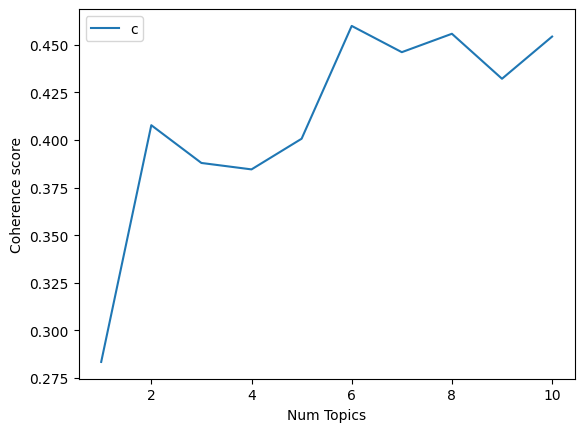

In [ ]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start, limit=limit, step=step)

#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
# ambil nilai koherensi tertinggi
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 5))

Num Topics = 1  has Coherence Value of 0.28345
Num Topics = 2  has Coherence Value of 0.40781
Num Topics = 3  has Coherence Value of 0.38797
Num Topics = 4  has Coherence Value of 0.38459
Num Topics = 5  has Coherence Value of 0.4007
Num Topics = 6  has Coherence Value of 0.45996
Num Topics = 7  has Coherence Value of 0.44617
Num Topics = 8  has Coherence Value of 0.45583
Num Topics = 9  has Coherence Value of 0.43221
Num Topics = 10  has Coherence Value of 0.45436


In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=6)

for idx, topic in model.print_topics(-1):
  print('Topic: {} Word: {}'. format(idx, topic))


Topic: 0 Word: 0.442*"bagus" + 0.097*"puas" + 0.094*"cepat" + 0.045*"simpel" + 0.037*"mudah" + 0.027*"top" + 0.025*"suka" + 0.021*"layan" + 0.020*"aman" + 0.017*"tingkat"
Topic: 1 Word: 0.104*"terima_kasih" + 0.038*"tarik_tunai" + 0.038*"kasih" + 0.035*"terima" + 0.030*"manfaat" + 0.020*"tarik" + 0.018*"luar_biasa" + 0.018*"tidak" + 0.016*"bisa" + 0.014*"tunai"
Topic: 2 Word: 0.386*"mantap" + 0.183*"mudah" + 0.115*"transaksi" + 0.043*"guna" + 0.036*"lancar" + 0.026*"syukur" + 0.013*"pakai" + 0.011*"sukses" + 0.010*"foto_ktp" + 0.009*"aman"
Topic: 3 Word: 0.342*"okay" + 0.030*"nyaman" + 0.029*"kode_verifikasi" + 0.014*"data" + 0.013*"buruk" + 0.012*"aman" + 0.012*"kode" + 0.011*"semua" + 0.010*"sendiri" + 0.010*"tanda_tangan"
Topic: 4 Word: 0.042*"tidak" + 0.033*"daftar" + 0.032*"verifikasi_wajah" + 0.031*"bisa" + 0.025*"gagal" + 0.020*"praktis" + 0.019*"susah" + 0.017*"rumit" + 0.016*"eror" + 0.015*"verifikasi"
Topic: 5 Word: 0.508*"bantu" + 0.187*"baik" + 0.023*"isi_ulang" + 0.017*"ba

In [ ]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'ldabri.html')


/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.233764  0.059511       1        1  22.742548
1     -0.161916  0.032730       2        1  19.661211
2      0.186843  0.160497       3        1  17.100296
0      0.291126  0.132881       4        1  15.129386
3     -0.187800  0.029917       5        1  12.818138
5      0.105511 -0.415535       6        1  12.548421, topic_info=        Term         Freq        Total Category  logprob  loglift
10     bantu  2878.000000  2878.000000  Default  30.0000  30.0000
25     bagus  2941.000000  2941.000000  Default  29.0000  29.0000
21    mantap  2897.000000  2897.000000  Default  28.0000  28.0000
3       okay  1924.000000  1924.000000  Default  27.0000  27.0000
9       baik  1031.000000  1031.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
136      isi    42.877959    69.816228   Topic6  -4.8558   1.58

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:508:

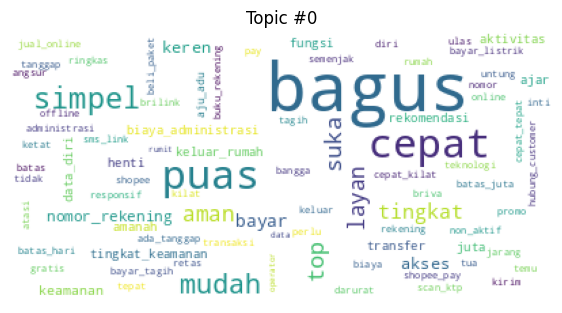

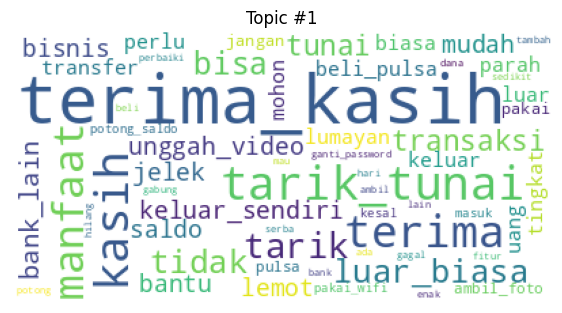

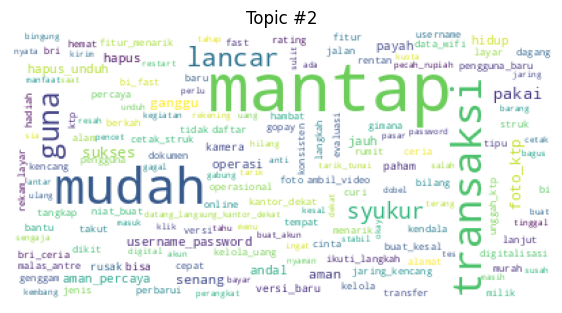

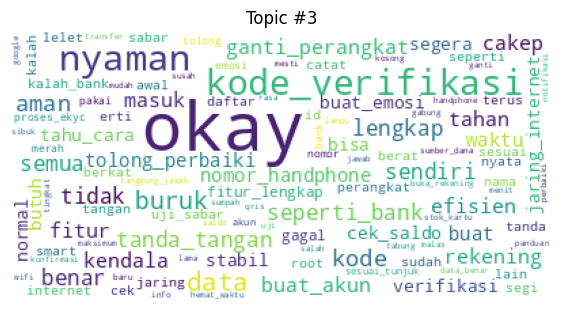

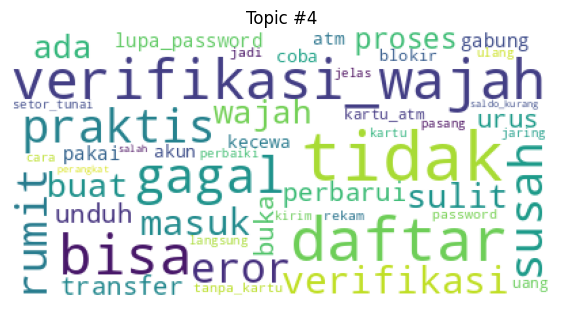

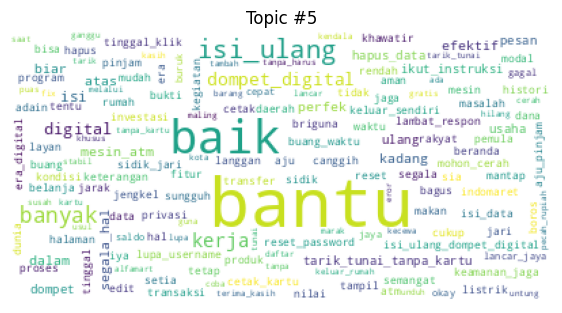

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(background_color="white",max_font_size=50, min_font_size=6).fit_words(dict(model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("wcld-topic11-#"+str(t)+".png", facecolor='k', bbox_inches='tight')

plt.show()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis .gensim.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)
